# CS 254 Project 1, Approach 2: Image-based



Based on Assignment 4 from CS 254 Machine Learning Course (Instructor: Safwan Wshah, University of Vermont)

### Google Colab Setup


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#%%
# from google.colab import drive
# drive.mount('/content/drive/')

import os

DATA_PATH_AFTER_MY_DRIVE = 'CS254/CS254-FinalProject/Data' # change this directory to yours
ECG_PATH_AFTER_DATA = 'ECG_Zheng et al 2022/_Processed_new/Images'
EEG_PATH_AFTER_DATA = 'EMG_DiNardo et al 2022/_Processed_new/Images'
EMG_PATH_AFTER_DATA = 'EEG_Kaya et al 2018/_Processed_new/Images'

DATA_PATH = os.path.join('drive','MyDrive',DATA_PATH_AFTER_MY_DRIVE)
ECG_PATH = os.path.join(DATA_PATH,ECG_PATH_AFTER_DATA)
EEG_PATH = os.path.join(DATA_PATH,EEG_PATH_AFTER_DATA)
EMG_PATH = os.path.join(DATA_PATH,EMG_PATH_AFTER_DATA)

# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks' # change this directory to yours
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

# Introduction

In this method, we will be performing image classification using labeled images created from electrophysiology signals.

We will visualize the data, split it into training, validation, and testing groups, and then atempt to model it with (A) logistic regression methods from the sklearn library and (B) TensorFlow Keras neural network. After modeling, we will analyze the results and determine how well the model performed.

In [4]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# tensorflow
import tensorflow as tf

In [5]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [6]:
#function that you will use to convert matrix to dataframe, useful for visulization. 
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

## Part 0: Prepare the data

#### Load Data




In [7]:
sample_image_height = 210
sample_image_width = 158

sample_count_per_type = 500
data = np.zeros([sample_count_per_type*3,sample_image_height*sample_image_width]) # 1500 samples (500 per type), # features (pixels)
target = []
n = 0


# EEG data
IMAGE_PATH = EEG_PATH
for fn in os.listdir(IMAGE_PATH):
    # fn = FILES[file_index]
    if fn.endswith(".png"):
      # print(fn)
      I = image.imread(IMAGE_PATH + "/" + fn)
      # plt.figure(1)
      # plt.imshow(I)
      # print(I.shape)
      # I = I[:,:,2] # only keep blue
      # plt.figure(2)
      # plt.imshow(I)
      # print(I.shape)
      I = I.flatten() # flatten image
      # print(I.shape)
      data[n,:] = I
      target.append('EEG')
      n = n+1
      if n == sample_count_per_type: break


# EMG data
IMAGE_PATH = EMG_PATH
for fn in os.listdir(IMAGE_PATH):
    # fn = FILES[file_index]
    if fn.endswith(".png"):
      # print(fn)
      I = image.imread(IMAGE_PATH + "/" + fn)
      # plt.figure(1)
      # plt.imshow(I)
      # print(I.shape)
      # I = I[:,:,2] # only keep blue
      # plt.figure(2)
      # plt.imshow(I)
      # print(I.shape)
      I = I.flatten() # flatten image
      # print(I.shape)
      data[n,:] = I
      target.append('EMG')
      n = n+1
      if n == sample_count_per_type*2: break

# ECG data
IMAGE_PATH = ECG_PATH
for fn in os.listdir(IMAGE_PATH):
    # fn = FILES[file_index]
    if fn.endswith(".png"):
      # print(fn)
      I = image.imread(IMAGE_PATH + "/" + fn)
      # plt.figure(1)
      # plt.imshow(I)
      # print(I.shape)
      # I = I[:,:,2] # only keep blue
      # plt.figure(2)
      # plt.imshow(I)
      # print(I.shape)
      I = I.flatten() # flatten image
      # print(I.shape)
      data[n,:] = I
      target.append('ECG')
      n = n+1
      if n == sample_count_per_type*3: break



In [8]:
print(data.shape)
print(len(target))
print(f'{n} processed')

(1500, 33180)
1500
1500 processed


## Logistic Regression Model

In [9]:
pca = PCA(n_components = 10) # create the principle component using PCA object
transformed_data = pca.fit_transform(data) #  reduce the data 
print(transformed_data.shape)


(1500, 10)


#### Train Test Split
- To validate model performance and generalization ability, we need to create training and testing groups.
- Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.htmlsklearn"> train_test_split function </a> to split your dataset into training data and testing data. This function has already been imported; you simply need to correctly call it and store its output.


<b>Important: when you call this function, you must use a test size of 0.25 and a random_state of 0.*</b>

In [10]:
# print(data.shape)
# print(target.shape)
x_train, x_test, y_train, y_test = train_test_split(transformed_data, target, test_size = 0.25) # add your code here

#### Logistic Regression model
- Create a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression"> LogisticRegression</a> object. This object has already been imported from sklearn's linear_model class. You do not need to add any additional arguments to the object's initialization, the default settings will be fine.
- Call LogisticRegression's .fit() function on your model, using your training data as parameters.
- Call LogisticRegression's .predict() function on your model using your testing data as a parameter and store the results.

In [11]:
# add your code here
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) 
y_test_predict = log_reg.predict(x_test)
print(x_test.shape, y_test_predict.shape)

(375, 10) (375,)


#### Visualization


In [12]:
conf_matrix = confusion_matrix(np.array(y_test),y_test_predict)
conf_matrix_to_df(conf_matrix, np.unique(target))

,ECG,EEG,EMG
ECG,95,4,24
EEG,5,121,3
EMG,46,10,67


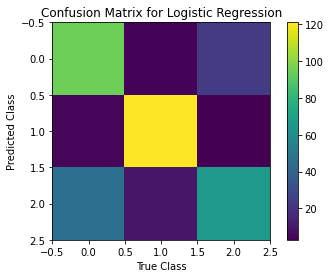

In [13]:
# add your code here to visualize the confusion matrix heat map, the output should look similar to the image below.
# hint use plt.imshow and plt.colorbar() functions
plt.figure('Confusion Matrix',clear = True)
plt.imshow(conf_matrix)
plt.colorbar()
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix for Logistic Regression')
plt.savefig(os.path.join(DATA_PATH,'confusion_matrix_for_logistic_regression.png'))

In [14]:
# add your code here to call classification_report from sklearn. you should get similar to the output below
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         ECG       0.65      0.77      0.71       123
         EEG       0.90      0.94      0.92       129
         EMG       0.71      0.54      0.62       123

    accuracy                           0.75       375
   macro avg       0.75      0.75      0.75       375
weighted avg       0.76      0.75      0.75       375



## Support Vector Machine

SVM model

In [15]:
svc_class = SVC(kernel='poly',degree=3, coef0=1,C = 5)
svc_class.fit(x_train,y_train)
y_test_predict = svc_class.predict(x_test)
print(x_test.shape, y_test_predict.shape)

(375, 10) (375,)


Visualization

In [16]:
conf_matrix = confusion_matrix(np.array(y_test),y_test_predict)
conf_matrix_to_df(conf_matrix, np.unique(target))

,ECG,EEG,EMG
ECG,122,0,1
EEG,1,125,3
EMG,3,0,120


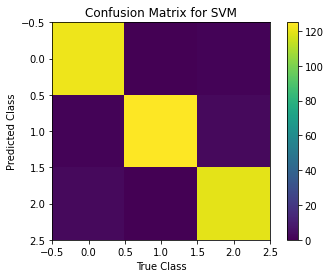

In [17]:
# add your code here to visualize the confusion matrix heat map, the output should look similar to the image below.
# hint use plt.imshow and plt.colorbar() functions
plt.figure('Confusion Matrix',clear = True)
plt.imshow(conf_matrix)
plt.colorbar()
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.title('Confusion Matrix for SVM')
plt.savefig(os.path.join(DATA_PATH,'confusion_matrix_for_svm.png'))

Classification report

In [18]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         ECG       0.97      0.99      0.98       123
         EEG       1.00      0.97      0.98       129
         EMG       0.97      0.98      0.97       123

    accuracy                           0.98       375
   macro avg       0.98      0.98      0.98       375
weighted avg       0.98      0.98      0.98       375

